# Distribusi Frekuensi

- Bentuk pengelolaan data dimana data dikelompokan berdasarkan interval tertentu, sehingga menjadi beberapa kelas (*classes*)
- Jumlah kemunculan data untuk setiap kelas dihitung. Ini dikenal dengan frekuensi.

# Contoh

In [1]:
import pandas as pd

data = pd.DataFrame(
    data={
        "class": ["1-3", "4-6", "7-9", "10-12", "13-15", "16-18"],
        "frequency": [5, 10, 8, 5, 4, 6]
    }
)

data

,class,frequency
0,1-3,5
1,4-6,10
2,7-9,8
3,10-12,5
4,13-15,4
5,16-18,6


- Terdapat 6 kelas (*class*).
- Anter kelas tidak ada *overlap* (tumpang tindih).
- Setiap kelas memiliki:
    - lower class limit: 1, 4, 7, 10, 13, 16
    - upper class limit: 3, 6, 9, 12, 15, 18
    - class width: 3

## Membuat Distribusi Frekuensi

1. Siapkan sekumpulan data.
2. Tentukan jumlah kelas, dilakukan dengan cara mengambil nilai *unique* dari kumpulan data.
3. Tentukan nilai terkecil (*min*) dan terbesar (*max*).
4. Hitung *range* dengan mengurangi nilai maksimum (*max*) dengan nilai minimum (*min*) $max\ -\ min$.
5. Hitung *classwidth* dengan cara membagi nilai *range* dengan jumlah kelas $\frac {range}{n_{class}}$

In [2]:
daftar_harga_kaos = [128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                     200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                     110, 126, 170, 132, 140, 112, 90, 340, 170, 190]

print(f"Daftar harga kaos:\n{daftar_harga_kaos}\n")
print(f"Harga kaos termurah:{min(daftar_harga_kaos)}\n")
print(f"Harga kaos termahal:{max(daftar_harga_kaos)}\n")

Daftar harga kaos:
[128, 100, 180, 150, 200, 90, 340, 105, 85, 270, 200, 65, 230, 150, 150, 120, 130, 80, 230, 200, 110, 126, 170, 132, 140, 112, 90, 340, 170, 190]

Harga kaos termurah:65

Harga kaos termahal:340



$min\ =\ 65$

$max\ =\ 340$

$range\ =\ max\ -\ min\ =\ 340\ -\ 65\ =\ 275$

$classwidth\ =\ \frac{range}{n_{class}} =\ \frac{275}{7} \approx\ 40$

In [3]:
daftar_harga_kaos_df = pd.DataFrame(
    data={
        "class": ["65-104", "105-144", "145-184", "185-224", "225-264", "265-304", "305-344"],
        "frequency": [6, 9, 6, 4, 2, 1, 2]
    }
)

daftar_harga_kaos_df

,class,frequency
0,65-104,6
1,105-144,9
2,145-184,6
3,185-224,4
4,225-264,2
5,265-304,1
6,305-344,2


# Midpoint, Relative Frequency, dan  Cummulative Frequency

$mid\text{_}point\ =\ \frac{lower\text{_}limit\ +\ uppper\text{_}limit}{2}$

$relative\text{_}frequency\ =\ \frac{class\text{_}frequency}{sample\text{_}size}\ =\ \frac{f}{n}$

In [4]:
lower_upper_df = pd.DataFrame(list(daftar_harga_kaos_df["class"].str.split("-")), columns=["lower", "upper"])
daftar_harga_kaos_df = daftar_harga_kaos_df.join(lower_upper_df)
daftar_harga_kaos_df = daftar_harga_kaos_df.astype({"lower":int, "upper":int})
daftar_harga_kaos_df["midpoint"] = (daftar_harga_kaos_df["lower"] + daftar_harga_kaos_df["upper"]) / 2
daftar_harga_kaos_df["relative_freq"] =  daftar_harga_kaos_df["frequency"] / 30
daftar_harga_kaos_df["cummulative_freq"] = daftar_harga_kaos_df["frequency"].cumsum()
daftar_harga_kaos_df

,class,frequency,lower,upper,midpoint,relative_freq,cummulative_freq
0,65-104,6,65,104,84.5,0.200000,6
1,105-144,9,105,144,124.5,0.300000,15
2,145-184,6,145,184,164.5,0.200000,21
3,185-224,4,185,224,204.5,0.133333,25
4,225-264,2,225,264,244.5,0.066667,27
5,265-304,1,265,304,284.5,0.033333,28
6,305-344,2,305,344,324.5,0.066667,30


# Visualisasi Data

## Histogram Plot

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

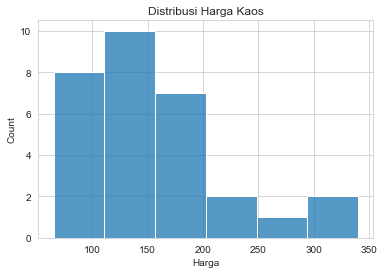

In [6]:
sns.set_style("whitegrid")
plt.title("Distribusi Harga Kaos")
plt.xlabel("Harga")
sns.histplot(daftar_harga_kaos);

## Distribution Plot

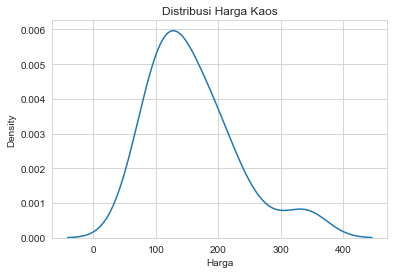

In [7]:
sns.set_style("whitegrid")
plt.title("Distribusi Harga Kaos")
plt.xlabel("Harga")
sns.kdeplot(daftar_harga_kaos);